# Random Lower Bound

In [2]:
import numpy as np
from joblib import delayed, Parallel

In [3]:
def random_sampling_lower_bound(orig_matrix, sparsity_level, n_samples):
    print("\nRandom Sampling Lower Bound Computation==\n")
    ret = 0
    iterator = np.array([np.random.choice(orig_matrix.shape[1], sparsity_level, replace=False) for _ in range(n_samples)])
    for ind in iterator:
        ret = max(ret,np.linalg.norm(orig_matrix[ind][:, ind], ord=2))
    return np.max(ret)

# Effect of number of samples

In [5]:
from tqdm.notebook import tqdm

def main_n_samples():
    K, p = 30, 10
    random_state = 42
    np.random.seed(random_state)

    D = np.random.randn(K, p)
    D /= np.linalg.norm(D, axis=1, ord=2, keepdims=True)
    B = D.dot(D.T)

    L = np.linalg.norm(B, ord=2)
    B /= L
    
    n_samples_list = [100,1000,10000,100000]
    results = {}
    
    for n_sample in n_samples_list:
        results[n_sample] = []
        
    for n_samples in tqdm(n_samples_list):
    
        for k in range(1, K+1):
            print(f"\rComputing k-SPCA bounds: {(k-1) / K:7.2%}")
            L_S = random_sampling_lower_bound(B,k,n_samples=n_samples)
            if k>1:
                L_S = max(L_S, results[n_samples][-1])
            results[n_samples].append(L_S)
    return results

In [6]:
results_n_samples = main_n_samples()

  0%|          | 0/4 [00:00<?, ?it/s]

Computing k-SPCA bounds:   0.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:   3.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:   6.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  10.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  13.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  16.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  20.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  23.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  26.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  30.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  33.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  36.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  40.00%

Random Sampling Lower Bound Computation==


In [8]:
results_n_samples.keys()

dict_keys([100, 1000, 10000, 100000])

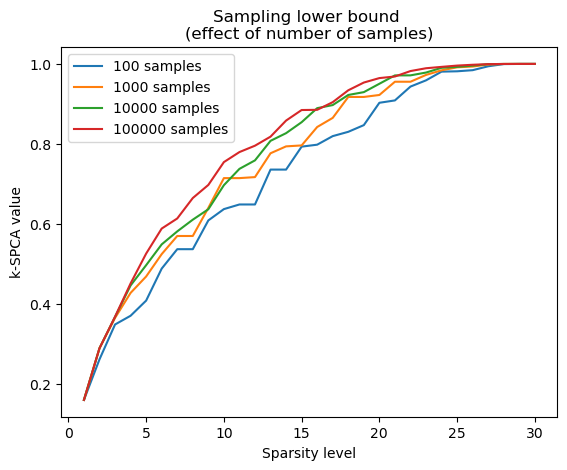

In [12]:
import matplotlib.pyplot as plt
plt.title("Sampling lower bound \n(effect of number of samples)")
for n_sample in list(results_n_samples.keys()):
    plt.plot(range(1, 30+1), results_n_samples[n_sample], label = str(n_sample)+' samples')
plt.legend()
plt.xlabel("Sparsity level")
plt.ylabel("k-SPCA value")
plt.savefig("number_of_samples_lower_bound.png")
plt.show()

# Effect of Dimensions

In [19]:
def main_dim():
    K, n_samples = 30, 10000
    random_state = 42
    np.random.seed(random_state)

    n_dims_list = [2,5,10,20]
    results = {}
    
    for n_dims in n_dims_list:
        results[n_dims] = []

    for p in tqdm(n_dims_list):
        D = np.random.randn(K, p)
        D /= np.linalg.norm(D, axis=1, ord=2, keepdims=True)
        B = D.dot(D.T)

        L = np.linalg.norm(B, ord=2)
        B /= L
    
        for k in range(1, K+1):
            print(f"\rComputing k-SPCA bounds: {(k-1) / K:7.2%}")
            L_S = random_sampling_lower_bound(B,k,n_samples=10000)
            if k>1:
                L_S = max(L_S, results[p][-1])
            results[p].append(L_S)
    return results

In [20]:
results_n_dims = main_dim()

  0%|          | 0/4 [00:00<?, ?it/s]

Computing k-SPCA bounds:   0.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:   3.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:   6.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  10.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  13.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  16.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  20.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  23.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  26.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  30.00%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  33.33%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  36.67%

Random Sampling Lower Bound Computation==

Computing k-SPCA bounds:  40.00%

Random Sampling Lower Bound Computation==


In [21]:
results_n_dims.keys()

dict_keys([2, 5, 10, 20])

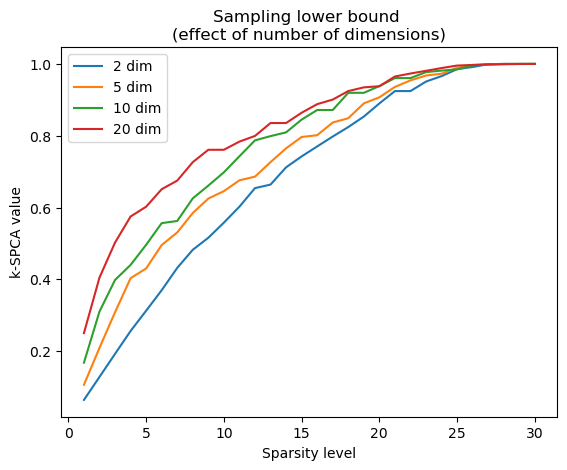

In [22]:
import matplotlib.pyplot as plt
plt.title("Sampling lower bound \n(effect of number of dimensions)")
for n_sample in list(results_n_dims.keys()):
    plt.plot(range(1, 30+1), results_n_dims[n_sample], label = str(n_sample)+' dim')
plt.legend()
plt.xlabel("Sparsity level")
plt.ylabel("k-SPCA value")
plt.savefig("number_of_dims_lower_bound.png")
plt.show()